In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


In [0]:
train=pd.read_csv('train.csv')
original_train=train.copy()
train.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1


In [0]:
test=pd.read_csv('test.csv')
original_test=test.copy()
test.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,2,6966,Short Term,673.0,1 year,Home Mortgage,54736.0,Home Improvements,839.28,16.4,8.0,6,0,2942,3881,0.0,0.0,NaN
1,6,9848,Short Term,NaN,6 years,Rent,NaN,Debt Consolidation,605.65,18.8,NaN,6,0,6957,8568,0.0,0.0,NaN
2,9,99999999,Short Term,724.0,3 years,Rent,27462.0,Debt Consolidation,338.69,10.8,NaN,10,0,11773,15369,0.0,0.0,NaN
3,12,6737,Short Term,NaN,3 years,Rent,NaN,Debt Consolidation,506.38,5.7,NaN,9,0,5841,10856,0.0,0.0,NaN
4,14,5878,Short Term,743.0,less than 1 year,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,5.0,14,0,35963,89459,0.0,0.0,NaN


In [0]:
train['Current.Loan.Amount']=train['Current.Loan.Amount'].replace(to_replace =99999999, 
                 value =np.nan) 
test['Current.Loan.Amount']=test['Current.Loan.Amount'].replace(to_replace =99999999, 
                 value =np.nan) 

In [0]:
for i in train['Credit.Score']:
  if i>1000:
    train['Credit.Score']=train['Credit.Score'].replace(to_replace =i, 
                 value =i/10) 

In [0]:
for i in test['Credit.Score']:
  if i>1000:
    test['Credit.Score']=test['Credit.Score'].replace(to_replace =i, 
                 value =i/10) 

In [0]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount              7397
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [0]:
train.dtypes

Loan.ID                           int64
Current.Loan.Amount             float64
Term                             object
Credit.Score                    float64
Years.in.current.job             object
Home.Ownership                   object
Annual.Income                   float64
Purpose                          object
Monthly.Debt                    float64
Years.of.Credit.History         float64
Months.since.last.delinquent    float64
Number.of.Open.Accounts           int64
Number.of.Credit.Problems         int64
Current.Credit.Balance            int64
Maximum.Open.Credit               int64
Bankruptcies                    float64
Tax.Liens                       float64
Loan.Status                       int64
dtype: object

In [0]:
imputer = KNNImputer(n_neighbors=5)

In [0]:
creditscore=np.array(train['Credit.Score'])
AnnualIncome=np.array(train['Annual.Income'])
currentloanamount=np.array(train['Current.Loan.Amount'])
Monthsincelastdelinquent=np.array(train['Months.since.last.delinquent'])
Bankruptcies=np.array(train['Bankruptcies'])
TaxLiens=np.array(train['Tax.Liens'])

In [0]:
train['Credit.Score'] = imputer.fit_transform(creditscore.reshape(-1, 1))
train['Annual.Income'] = imputer.fit_transform(AnnualIncome.reshape(-1, 1))
train['Current.Loan.Amount'] = imputer.fit_transform(currentloanamount.reshape(-1, 1))
train['Months.since.last.delinquent'] = imputer.fit_transform(Monthsincelastdelinquent.reshape(-1, 1))
train['Bankruptcies'] = imputer.fit_transform(Bankruptcies.reshape(-1, 1))
train['Tax.Liens'] = imputer.fit_transform(TaxLiens.reshape(-1, 1))

In [0]:
train['Years.in.current.job'].fillna(train['Years.in.current.job'].mode()[0], inplace=True)

In [0]:
train['ratio']=train['Monthly.Debt']/(train['Annual.Income']/12)

In [0]:
train.isnull().sum()

Loan.ID                         0
Current.Loan.Amount             0
Term                            0
Credit.Score                    0
Years.in.current.job            0
Home.Ownership                  0
Annual.Income                   0
Purpose                         0
Monthly.Debt                    0
Years.of.Credit.History         0
Months.since.last.delinquent    0
Number.of.Open.Accounts         0
Number.of.Credit.Problems       0
Current.Credit.Balance          0
Maximum.Open.Credit             0
Bankruptcies                    0
Tax.Liens                       0
Loan.Status                     0
ratio                           0
dtype: int64

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train['Credit.Score'].values.reshape(-1,1))
train['Credit.Score'] = pd.DataFrame(x_scaled)
x_scaled1 = min_max_scaler.fit_transform(train['Annual.Income'].values.reshape(-1,1))
train['Annual.Income'] = pd.DataFrame(x_scaled1)

x_scaled2 = min_max_scaler.fit_transform(train['Current.Loan.Amount'].values.reshape(-1,1))
train['Current.Loan.Amount'] = pd.DataFrame(x_scaled2)

x_scaled3 = min_max_scaler.fit_transform(train['Months.since.last.delinquent'].values.reshape(-1,1))
train['Months.since.last.delinquent'] = pd.DataFrame(x_scaled3)

x_scaled4 = min_max_scaler.fit_transform(train['Bankruptcies'].values.reshape(-1,1))
train['Bankruptcies']= pd.DataFrame(x_scaled4)

x_scaled5 = min_max_scaler.fit_transform(train['Tax.Liens'].values.reshape(-1,1))
train['Tax.Liens'] = pd.DataFrame(x_scaled5)

x_scaled6 = min_max_scaler.fit_transform(train['Monthly.Debt'].values.reshape(-1,1))
train['Monthly.Debt'] = pd.DataFrame(x_scaled6)

x_scaled7 = min_max_scaler.fit_transform(train['Years.of.Credit.History'].values.reshape(-1,1))
train['Years.of.Credit.History'] = pd.DataFrame(x_scaled7)

In [0]:
x_scaled8 = min_max_scaler.fit_transform(train['Number.of.Open.Accounts'].values.reshape(-1,1))
train['Number.of.Open.Accounts']= pd.DataFrame(x_scaled8)

x_scaled9 = min_max_scaler.fit_transform(train['Number.of.Credit.Problems'].values.reshape(-1,1))
train['Number.of.Credit.Problems'] = pd.DataFrame(x_scaled9)

x_scaled10 = min_max_scaler.fit_transform(train['Current.Credit.Balance'].values.reshape(-1,1))
train['Current.Credit.Balance'] = pd.DataFrame(x_scaled10)

x_scaled11 = min_max_scaler.fit_transform(train['Maximum.Open.Credit'].values.reshape(-1,1))
train['Maximum.Open.Credit'] = pd.DataFrame(x_scaled11)



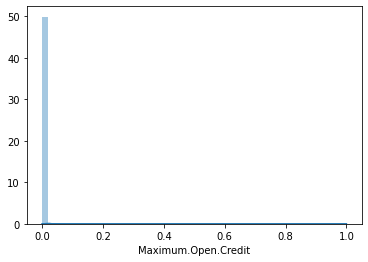

In [0]:
sns.distplot(train['Maximum.Open.Credit'])

In [0]:
train.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,0.491409,Short Term,0.927711,6 years,Home Mortgage,0.010459,Debt Consolidation,0.166631,0.541301,0.028409,0.342105,0.000000,0.028067,0.001111,0.000000,0.0,1
1,1,0.385280,Long Term,0.204819,6 years,Rent,0.005757,Debt Consolidation,0.117588,0.159930,0.198065,0.105263,0.000000,0.026841,0.000861,0.000000,0.0,1
2,3,0.385280,Short Term,0.921687,less than 1 year,Rent,0.004158,Medical Bills,0.063291,0.511424,0.340909,0.118421,0.066667,0.004637,0.000156,0.166667,0.0,1
3,4,0.302651,Short Term,0.921687,4 years,Rent,0.005706,Debt Consolidation,0.149888,0.214411,0.198065,0.105263,0.066667,0.013787,0.000715,0.166667,0.0,1
4,5,0.088091,Short Term,0.879518,10+ years,Home Mortgage,0.004988,Home Improvements,0.037516,0.219684,0.267045,0.078947,0.000000,0.026807,0.000705,0.000000,0.0,1


Data transformation

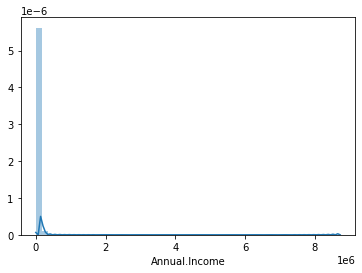

In [0]:
sns.distplot(train['Annual.Income'])

In [0]:
print(train['Annual.Income'].skew())

64.51036652704018


In [0]:
print(np.log(train['Annual.Income']).skew())

-0.00021441746451924336


In [0]:
train['Annual.Income']=np.log(train['Annual.Income'])
test['Annual.Income']=np.log(test['Annual.Income'])

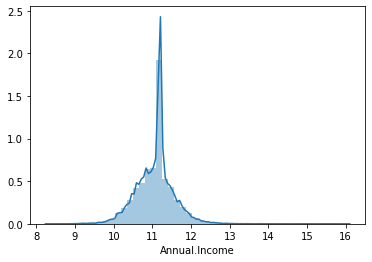

In [0]:
sns.distplot(train['Annual.Income'])

In [0]:
train=train.drop('Loan.ID',axis=1) 

In [0]:
test=test.drop('Loan.ID',axis=1) 

test=test.drop('Loan.Status',1)

In [0]:
X = train.drop('Loan.Status',1) 
y = train['Loan.Status']

In [0]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 

In [0]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
GradientBoostingClassifier(random_state=0)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
pred_cv =clf.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.756660453897599

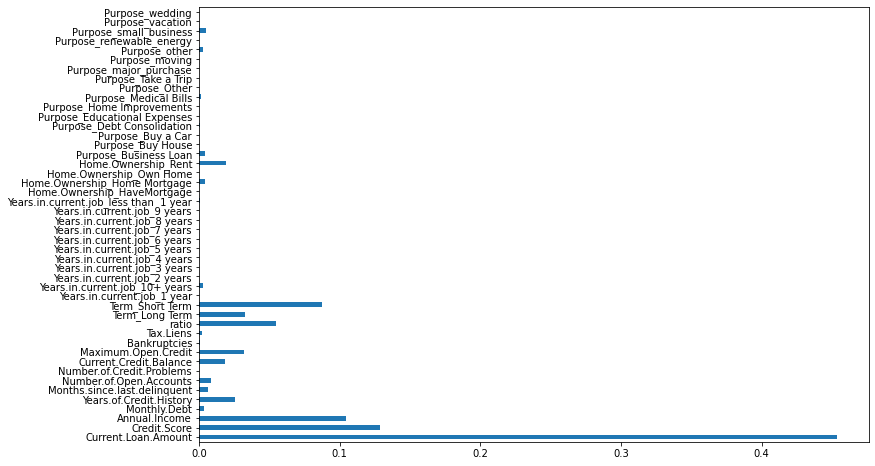

In [0]:
importances=pd.Series(clf.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7555640828856485

In [0]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
   xtr,xvl = X.loc[train_index],X.loc[test_index]
   ytr,yvl = y[train_index],y[test_index]
   model = LogisticRegression(random_state=1)
   model.fit(xtr, ytr)
   pred_test = model.predict(xvl)     
   f1score=accuracy_score(yvl, pred_test)    
   print('accuracy_score',f1score)

accuracy_score 0.7594770166927062
accuracy_score 0.7594770166927062
accuracy_score 0.7594770166927062
accuracy_score 0.759394786612943
accuracy_score 0.7595394736842105


In [0]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
   xtr,xvl = X.loc[train_index],X.loc[test_index]
   ytr,yvl = y[train_index],y[test_index]
   model = RandomForestClassifier(random_state=1, max_depth=19,n_estimators=141)
   model.fit(xtr, ytr)
   pred_test = model.predict(xvl)   
   f1score=accuracy_score(yvl, pred_test)    
   print('accuracy_score',f1score) 

accuracy_score 0.7607104678891539
accuracy_score 0.7625195296439438


KeyboardInterrupt: ignored

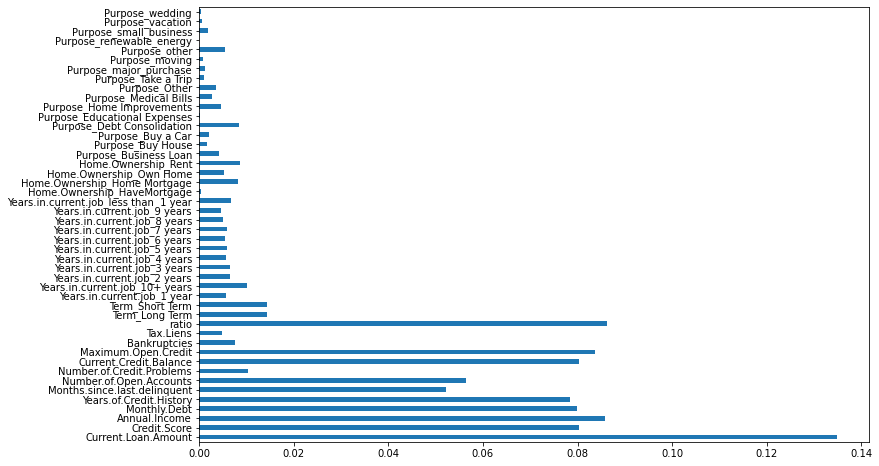

In [0]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [0]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  xtr,xvl = X.loc[train_index],X.loc[test_index]     
  ytr,yvl = y[train_index],y[test_index]         
  model = XGBClassifier(n_estimators=50, max_depth=19,random_state=1)     
  model.fit(xtr, ytr)   
  pred_test = model.predict(xvl)    
  rocscore=roc_auc_score(yvl,pred_test) 
  print("rocscore",rocscore)
  score = accuracy_score(yvl,pred_test)     
  print('accuracy_score',score)

rocscore 0.5358153342735412
accuracy_score 0.7501850176794671
rocscore 0.5433767161571406
accuracy_score 0.7552832826247842
rocscore 0.5410862363179384
accuracy_score 0.7555299728640736


KeyboardInterrupt: ignored